# Logistic Regression with Fixed Basis Functions and the IRLS Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, seed

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
seed(1643)

S1 = np.array([
    [.05, 0],
    [0, 0.05]
])


S2 = np.array([
    [.05, 0],
    [0, .07]
])


x1 = multivariate_normal([0, 0], S1, 50)

x2_1 = multivariate_normal([-1.5, -1.5], S2, 50)
x2_2 = multivariate_normal([1.5, 1.5], S2, 50)
x2 = np.r_[x2_1, x2_2]

In [4]:
def phi(x, m, s):
    return np.exp(-(x - m) ** 2 / s)

phi2 = np.c_[phi(x2[:, 0], 0, 1.4), phi(x2[:, 1], 1, 1.2)]
phi1 = np.c_[phi(x1[:, 0], 0, 1.4), phi(x1[:, 1], 1, 1.2)]

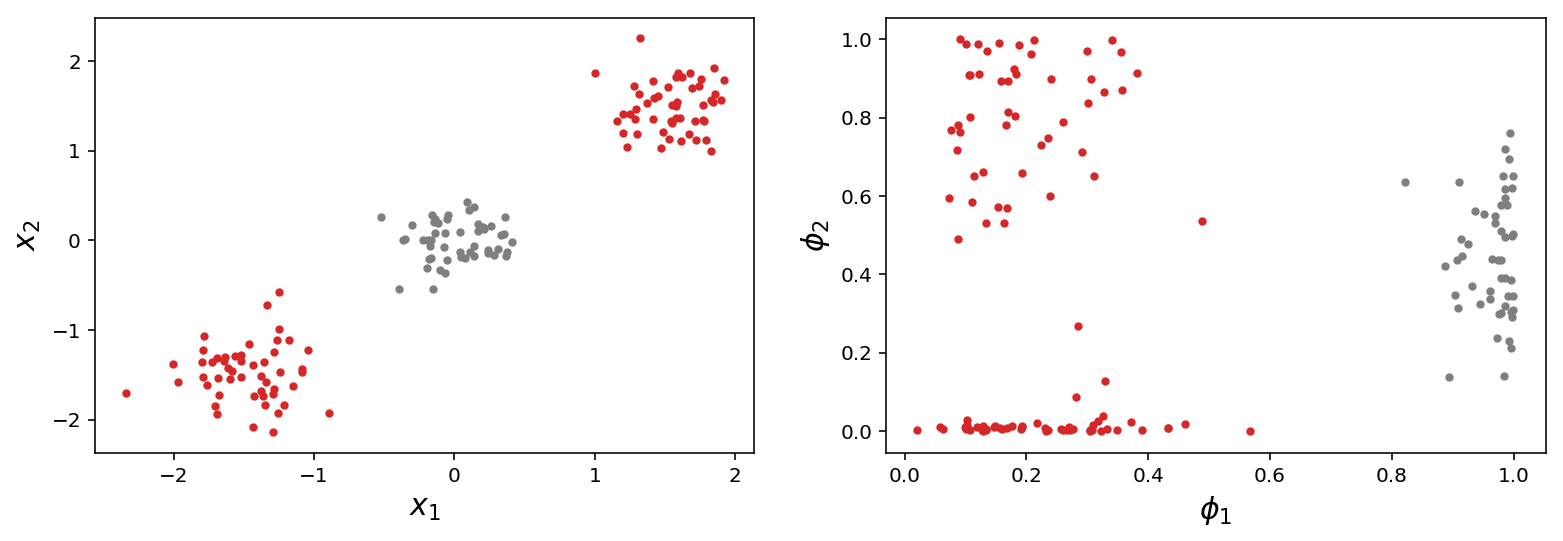

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].scatter(*x1.T, s=10, c="tab:gray")
ax[0].scatter(*x2.T, c="tab:red", s=10)
ax[0].set_xlabel("$x_1$", fontsize=15)
ax[0].set_ylabel("$x_2$", fontsize=15)

ax[1].scatter(*phi1.T, c="tab:gray", s=10)
ax[1].scatter(*phi2.T, c="tab:red", s=10)
ax[1].set_xlabel("$\phi_1$", fontsize=15)
ax[1].set_ylabel("$\phi_2$", fontsize=15);

The cross-entropy loss is defined as the negative log-likelihood function of a Bernoulli random variable:


$$
    E({\bf w}) = - \sum_{n=1}^N t_n \log\left(\sigma({\bf w}^T{\bf x})\right) + (1 - t_n) \log\left(1 - 
    \sigma({\bf w}^T{\bf x})\right)
$$